In [1]:
from itertools import product
import matplotlib as mpl
from matplotlib.pyplot import Line2D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from finite_volume.advection import AdvectionSolver
from configs import limiting_schemes_2d, problem_configs, solver_config
from utils import pd_xlsx_write

limiting_schemes = limiting_schemes_2d

viridis = mpl.colormaps["viridis"]


def color_p(p):
    return viridis(p / 7)


                       worst     frequency          mean
         upper   0.00000e+00   0.00000e+00              
         lower  -1.46608e-18   5.03836e-01              
         total  -1.46608e-18   5.03836e-01   1.28395e-18

solver.step_count=390

                       worst     frequency          mean
         upper  -1.16314e-11   2.39382e-01              
         lower  -6.79145e-11   5.90734e-01              
         total  -6.79145e-11   5.90734e-01  -1.46483e-12

solver.step_count=258

                       worst     frequency          mean
         upper   0.00000e+00   0.00000e+00              
         lower   0.00000e+00   0.00000e+00              
         total   0.00000e+00   0.00000e+00   3.80899e-10

solver.step_count=2310

                       worst     frequency          mean
         upper   0.00000e+00   0.00000e+00              
         lower  -9.43233e-12   5.74713e-03              
         total  -9.43233e-12   5.74713e-03   1.19653e-10

solver.step_c

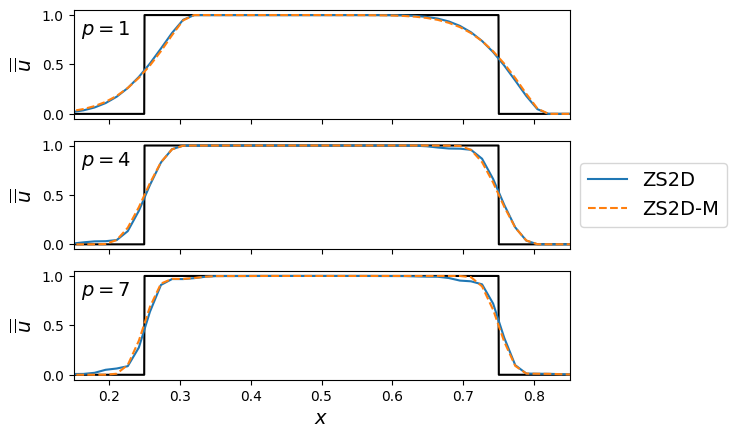

In [2]:
fig, axs = plt.subplots(3, 1, sharex=True, sharey=True)

high_res_initial_solver = AdvectionSolver(n=(2056,), **problem_configs["square2d"])
for i in range(3):
    high_res_initial_solver.plot_slice(axs[i], color="black", y=0.5)

degrees = [1, 4, 7]

for (i, p), lckey in product(enumerate(degrees), ["ZS2D", "ZS2D-M"]):
    solver = AdvectionSolver(
        n=(64,),
        order=p + 1,
        snapshot_dt=0.1,
        num_snapshots=10,
        **limiting_schemes[lckey],
        **problem_configs["square2d"],
        **solver_config,
    )
    solver.highest = 3
    solver.rkorder()
    solver.plot_slice(
        axs[i], linestyle={"ZS2D": "-", "ZS2D-M": "--"}[lckey], label=lckey, y=0.5
    )
    solver.report_mpp_violations()
    print(f"{solver.step_count=}")

# cosmetics
fontsize = 14
axs[0].set_xlim(0.15, 0.85)
axs[0].text(
    0.16,
    0.85,
    f"$p={degrees[0]}$",
    horizontalalignment="left",
    verticalalignment="center",
    size=fontsize,
)
axs[1].text(
    0.16,
    0.85,
    f"$p={degrees[1]}$",
    horizontalalignment="left",
    verticalalignment="center",
    size=fontsize,
)
axs[2].text(
    0.16,
    0.85,
    f"$p={degrees[2]}$",
    horizontalalignment="left",
    verticalalignment="center",
    size=fontsize,
)
axs[2].set_xlabel("$x$", fontsize=fontsize)
for i in range(3):
    axs[i].set_ylabel("$\overline{\overline{u}}$", fontsize=fontsize)
axs[1].legend(loc="center", bbox_to_anchor=(1.17, 0.5), fontsize=fontsize)
fig.savefig("images/square2d_ZS2D_vs_ZS2D-M.png", dpi=300, bbox_inches="tight")

In [3]:
data = []
for lckey, p, integrator in product(
    ["ZS2D", "ZS2D-T", "FMH2D-min-CB", "FMH2D-min-CB-T"],
    [2, 3, 4, 5, 6, 7],
    ["SSPRK3", "RK4", "RK6"],
):
    print(f"{lckey=}, {p=}, {integrator=}")
    solver = AdvectionSolver(
        n=(64,),
        order=p + 1,
        snapshot_dt=0.1,
        num_snapshots=10,
        **limiting_schemes[lckey],
        **problem_configs["square2d"],
        **solver_config,
    )
    if lckey == "MUSCL-Hancock":
        if p == 1:
            solver.euler()
        else:
            continue
    if integrator == "SSPRK3":
        if p < 2:
            continue
        solver.ssprk3()
    elif integrator == "RK4":
        if p < 3:
            continue
        solver.rk4()
    elif integrator == "RK6":
        if p < 4:
            continue
        solver.rk6()
    data.append(
        dict(
            scheme=lckey,
            p=p,
            integrator=integrator,
            delta=solver.compute_mpp_violations()[1]["worst"],
        )
    )
df = pd.DataFrame(data).sort_values(by="p")
df["integrator"] = df["integrator"].astype(
    pd.CategoricalDtype(["SSPRK3", "RK4", "RK6"], ordered=True)
)
df["scheme"] = df["scheme"].astype(
    pd.CategoricalDtype(
        ["ZS2D", "ZS2D-T", "FMH2D-min-CB", "FMH2D-min-CB-T"], ordered=True
    )
)

pt = pd.pivot_table(df, index=["p", "integrator"], values="delta", columns="scheme")
pt

lckey='ZS2D', p=2, integrator='SSPRK3'
lckey='ZS2D', p=2, integrator='RK4'
lckey='ZS2D', p=2, integrator='RK6'
lckey='ZS2D', p=3, integrator='SSPRK3'
lckey='ZS2D', p=3, integrator='RK4'
lckey='ZS2D', p=3, integrator='RK6'
lckey='ZS2D', p=4, integrator='SSPRK3'
lckey='ZS2D', p=4, integrator='RK4'
lckey='ZS2D', p=4, integrator='RK6'
lckey='ZS2D', p=5, integrator='SSPRK3'
lckey='ZS2D', p=5, integrator='RK4'
lckey='ZS2D', p=5, integrator='RK6'
lckey='ZS2D', p=6, integrator='SSPRK3'
lckey='ZS2D', p=6, integrator='RK4'
lckey='ZS2D', p=6, integrator='RK6'
lckey='ZS2D', p=7, integrator='SSPRK3'
lckey='ZS2D', p=7, integrator='RK4'
lckey='ZS2D', p=7, integrator='RK6'
lckey='ZS2D-T', p=2, integrator='SSPRK3'
lckey='ZS2D-T', p=2, integrator='RK4'
lckey='ZS2D-T', p=2, integrator='RK6'
lckey='ZS2D-T', p=3, integrator='SSPRK3'
lckey='ZS2D-T', p=3, integrator='RK4'
lckey='ZS2D-T', p=3, integrator='RK6'
lckey='ZS2D-T', p=4, integrator='SSPRK3'
lckey='ZS2D-T', p=4, integrator='RK4'
lckey='ZS2D-T', p=4, 

scheme                ZS2D    ZS2D-T  FMH2D-min-CB  FMH2D-min-CB-T
p integrator                                                      
2 SSPRK3     -7.027236e-21 -0.013442     -0.000342       -0.000342
3 SSPRK3      0.000000e+00 -0.013785     -0.000185       -0.000161
  RK4         0.000000e+00 -0.013797     -0.000039       -0.000035
4 SSPRK3      0.000000e+00 -0.016137     -0.000134       -0.000143
  RK4         0.000000e+00 -0.016136     -0.000077       -0.000072
  RK6        -8.955195e-08 -0.016135     -0.000166       -0.000166
5 SSPRK3     -1.590506e-56 -0.016296     -0.000296       -0.000287
  RK4        -3.863403e-56 -0.016296     -0.000059       -0.000058
  RK6        -8.517205e-07 -0.016296     -0.000192       -0.000190
6 SSPRK3     -4.613664e-42 -0.017518     -0.000275       -0.000273
  RK4        -2.558865e-80 -0.017518     -0.000064       -0.000065
  RK6        -2.924806e-09 -0.017518     -0.000178       -0.000178
7 SSPRK3      0.000000e+00 -0.017617     -0.000289       -0.000287
  RK4         0.000000e+00 -0.017617     -0.000024       -0.000024
  RK6        -7.327873e-10 -0.017617     -0.000184       -0.000182

In [4]:
print(pt.to_latex(float_format="%.2e"))

\begin{tabular}{llrrrr}
\toprule
 & scheme & ZS2D & ZS2D-T & FMH2D-min-CB & FMH2D-min-CB-T \\
p & integrator &  &  &  &  \\
\midrule
2 & SSPRK3 & -7.03e-21 & -1.34e-02 & -3.42e-04 & -3.42e-04 \\
\cline{1-6}
\multirow[t]{2}{*}{3} & SSPRK3 & 0.00e+00 & -1.38e-02 & -1.85e-04 & -1.61e-04 \\
 & RK4 & 0.00e+00 & -1.38e-02 & -3.94e-05 & -3.46e-05 \\
\cline{1-6}
\multirow[t]{3}{*}{4} & SSPRK3 & 0.00e+00 & -1.61e-02 & -1.34e-04 & -1.43e-04 \\
 & RK4 & 0.00e+00 & -1.61e-02 & -7.75e-05 & -7.22e-05 \\
 & RK6 & -8.96e-08 & -1.61e-02 & -1.66e-04 & -1.66e-04 \\
\cline{1-6}
\multirow[t]{3}{*}{5} & SSPRK3 & -1.59e-56 & -1.63e-02 & -2.96e-04 & -2.87e-04 \\
 & RK4 & -3.86e-56 & -1.63e-02 & -5.87e-05 & -5.81e-05 \\
 & RK6 & -8.52e-07 & -1.63e-02 & -1.92e-04 & -1.90e-04 \\
\cline{1-6}
\multirow[t]{3}{*}{6} & SSPRK3 & -4.61e-42 & -1.75e-02 & -2.75e-04 & -2.73e-04 \\
 & RK4 & -2.56e-80 & -1.75e-02 & -6.37e-05 & -6.45e-05 \\
 & RK6 & -2.92e-09 & -1.75e-02 & -1.78e-04 & -1.78e-04 \\
\cline{1-6}
\multirow[t]{3}

delta_min=-1.2726194567189112e-20
delta_min=-1.272619461051864e-20
delta_min=-1.2726194567189112e-20
delta_min=-1.272619461051864e-20
delta_min=-1.2726194567189112e-20
delta_min=-1.272619461051864e-20
p=1, delta_min=-0.008722157420283594
p=1, delta_min=-9.46533449075256e-11
p=3, delta_min=-0.0013621745870413537
p=3, delta_min=-3.4574516786234355e-05
p=7, delta_min=-0.00763386460621529
p=7, delta_min=-2.3840729707291786e-05


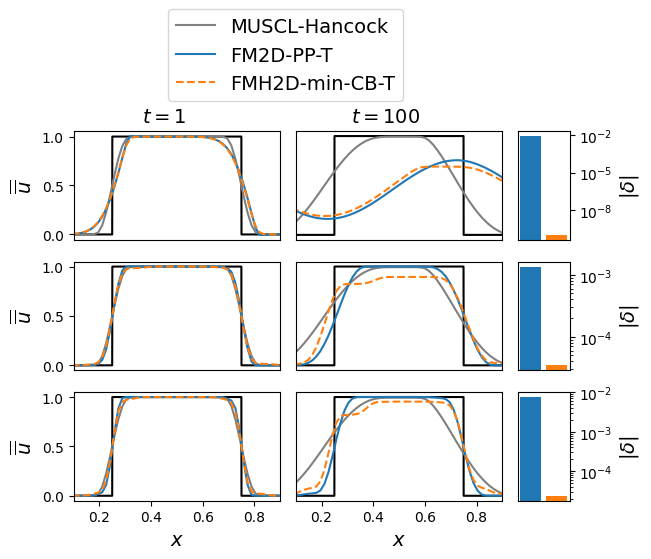

In [12]:
fig, axs = plt.subplots(3, 3, gridspec_kw={"width_ratios": [1, 1, 0.25]})
for i in range(3):
    axs[i, 2].set_yscale("log")
    axs[i, 2].yaxis.tick_right()
    axs[i, 2].yaxis.set_label_position("right")

# plot initial condition
high_res_initial_solver = AdvectionSolver(n=(2056,), **problem_configs["square2d"])
for i, j in product((0, 1, 2), (0, 1)):
    high_res_initial_solver.plot_slice(axs[i, j], color="black", y=0.5)
    axs[i, j].set_xlim(0.1, 0.9)

# plot MUSCL-Hancock
for i, (j, (snapshot_dt, num_snapshots)) in product(
    range(3), enumerate([(0.1, 10), (1.0, 100)])
):
    solver = AdvectionSolver(
        n=(64,),
        order=2,
        snapshot_dt=snapshot_dt,
        num_snapshots=num_snapshots,
        **limiting_schemes["MUSCL-Hancock"],
        **problem_configs["square2d"],
        **solver_config,
    )
    solver.euler()
    print(f"delta_min={solver.compute_mpp_violations()[1]['worst']}")
    solver.plot_slice(axs[i, j], color="grey", label="MUSCL-Hancock", y=0.5)

# plot high order a posteriori limited solutions
degrees = [1, 3, 7]

for (i, p), (j, (snapshot_dt, num_snapshots)), lckey in product(
    enumerate(degrees),
    enumerate([(0.1, 10), (1.0, 100)]),
    ["FM2D-PP-T", "FMH2D-min-CB-T"],
):
    solver = AdvectionSolver(
        n=(64,),
        order=p + 1,
        snapshot_dt=snapshot_dt,
        num_snapshots=num_snapshots,
        **limiting_schemes[lckey],
        **problem_configs["square2d"],
        **solver_config,
    )
    solver.rkorder()
    solver.plot_slice(
        axs[i, j],
        linestyle={"FM2D-PP-T": "-", "FMH2D-min-CB-T": "--"}[lckey],
        label=lckey,
        y=0.5,
    )
    if j == 1:
        print(f"{p=}, delta_min={solver.compute_mpp_violations()[1]['worst']}")

    # plot on bar
    axs[i, 2].bar(
        lckey,
        -solver.compute_mpp_violations()[1]["worst"],
        color={"FM2D-PP-T": "tab:blue", "FMH2D-min-CB-T": "tab:orange"}[lckey],
    )

# cosmetics
fontsize = 14
axs[1, 1].legend(loc="center", bbox_to_anchor=(-0.05, 2.9), fontsize=fontsize)
axs[0, 0].text(
    0.45,
    1.2,
    "$t=1$",
    size=fontsize,
    horizontalalignment="center",
    verticalalignment="center",
)
axs[0, 1].text(
    0.45,
    1.2,
    "$t=100$",
    size=fontsize,
    horizontalalignment="center",
    verticalalignment="center",
)
axs[2, 0].set_xlabel("$x$", fontsize=fontsize)
axs[2, 1].set_xlabel("$x$", fontsize=fontsize)
for i in range(3):
    axs[i, 1].get_yaxis().set_visible(False)
    axs[i, 0].set_ylabel("$\overline{\overline{u}}$", fontsize=fontsize)
    axs[i, 2].get_xaxis().set_visible(False)
    axs[i, 2].set_ylabel("$|\delta|$", fontsize=fontsize)
    axs[i, 2].tick_params(axis="x", labelrotation=90)
for i, j in product((0, 1), (0, 1)):
    axs[i, j].get_xaxis().set_visible(False)
plt.subplots_adjust(wspace=0.1)
fig.savefig("images/square2d_aposteriori_comparison.png", dpi=300, bbox_inches="tight")

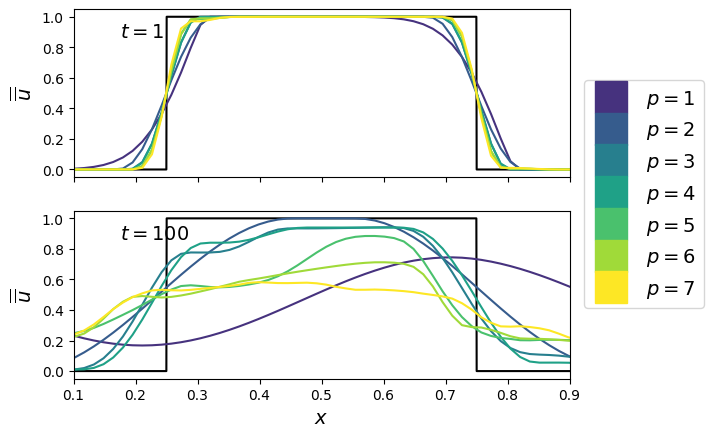

In [11]:
fig, axs = plt.subplots(2, 1, sharex=True, sharey=True)

# plot initial condition
high_res_initial_solver = AdvectionSolver(n=(2048,), **problem_configs["square2d"])
for i in range(2):
    high_res_initial_solver.plot_slice(axs[i], color="black", y=0.5)
    axs[i].set_xlim(0.1, 0.9)

# plot high order a priori limited solutions
degrees = [1, 2, 3, 4, 5, 6, 7]

for (
    (i, p),
    (j, (snapshot_dt, num_snapshots)),
) in product(enumerate(degrees), enumerate([(0.1, 10), (1.0, 100)])):
    solver = AdvectionSolver(
        n=(64,),
        order=p + 1,
        snapshot_dt=snapshot_dt,
        num_snapshots=num_snapshots,
        **limiting_schemes["ZS2D-M"],
        **problem_configs["square2d"],
        **solver_config,
    )
    solver.highest = 3
    solver.rkorder()
    solver.plot_slice(axs[j], color=color_p(p), label=f"${p=}$", y=0.5)

# cosmetics
leg = axs[0].legend(loc="center", bbox_to_anchor=(1.15, -0.1), fontsize=fontsize)
for line, p in zip(leg.get_lines(), degrees):
    line.set_linestyle("none")
    line.set_marker("s")
    line.set_markersize(23)
    line.set_markerfacecolor(color_p(p))
axs[1].set_xlabel("$x$", fontsize=fontsize)
for i in range(2):
    axs[i].set_ylabel("$\overline{\overline{u}}$", fontsize=fontsize)
axs[0].text(
    0.175,
    0.9,
    "$t=1$",
    horizontalalignment="left",
    verticalalignment="center",
    size=fontsize,
)
axs[1].text(
    0.175,
    0.9,
    "$t=100$",
    horizontalalignment="left",
    verticalalignment="center",
    size=fontsize,
)
fig.savefig("images/square2d_apriori_comparison.png", dpi=300, bbox_inches="tight")

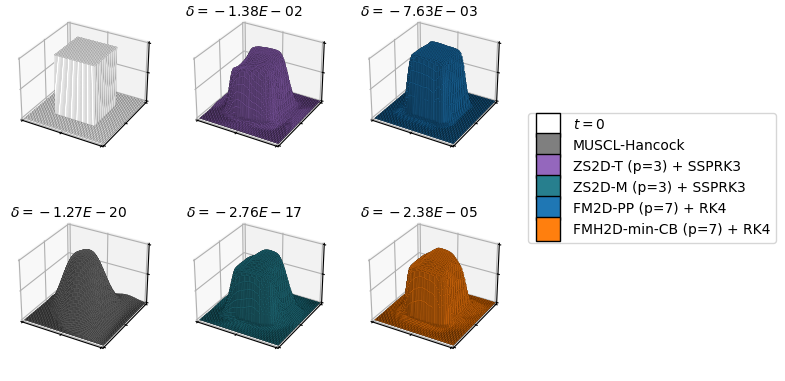

In [7]:
fig, axs = plt.subplots(2, 3, subplot_kw={"projection": "3d"})

n = 64
snapshot_dt = 1.0
num_snapshots = 100
i = -1
zoom = 1
azdeg = 90
altdeg = 45
fontsize = 10

# initial condition
solver = AdvectionSolver(
    n=(n,),
    **problem_configs["square2d"],
)
solver.plot_cubes(
    axs[0, 0],
    color="white",
    zoom=zoom,
    azdeg=azdeg,
    altdeg=altdeg,
    raise_floor=True,
    shade=False,
)

# MUSCL-Hancock
solver = AdvectionSolver(
    n=(n,),
    order=2,
    snapshot_dt=snapshot_dt,
    num_snapshots=num_snapshots,
    **limiting_schemes["MUSCL-Hancock"],
    **problem_configs["square2d"],
    **solver_config,
)
solver.euler()
solver.plot_cubes(
    axs[1, 0],
    color="grey",
    i=i,
    zoom=zoom,
    azdeg=azdeg,
    altdeg=altdeg,
    raise_floor=True,
)
axs[1, 0].text(
    0,
    1,
    1.2,
    f"$\delta={solver.compute_mpp_violations()[1]['worst']:.2E}$",
    horizontalalignment="center",
    verticalalignment="center",
    fontsize=fontsize,
)

# ZS2D-T
solver = AdvectionSolver(
    n=(n,),
    order=4,
    snapshot_dt=snapshot_dt,
    num_snapshots=num_snapshots,
    **limiting_schemes["ZS2D-T"],
    **problem_configs["square2d"],
    **solver_config,
)
solver.ssprk3()
solver.plot_cubes(
    axs[0, 1],
    color="tab:purple",
    i=i,
    zoom=zoom,
    azdeg=azdeg,
    altdeg=altdeg,
    raise_floor=True,
)
axs[0, 1].text(
    0,
    1,
    1.2,
    f"$\delta={solver.compute_mpp_violations()[1]['worst']:.2E}$",
    horizontalalignment="center",
    verticalalignment="center",
    fontsize=fontsize,
)

# ZS2D-M
solver = AdvectionSolver(
    n=(n,),
    order=4,
    snapshot_dt=snapshot_dt,
    num_snapshots=num_snapshots,
    **limiting_schemes["ZS2D-M"],
    **problem_configs["square2d"],
    **solver_config,
)
solver.ssprk3()
solver.plot_cubes(
    axs[1, 1],
    color=color_p(3),
    i=i,
    zoom=zoom,
    azdeg=azdeg,
    altdeg=altdeg,
    raise_floor=True,
)
axs[1, 1].text(
    0,
    1,
    1.2,
    f"$\delta={solver.compute_mpp_violations()[1]['worst']:.2E}$",
    horizontalalignment="center",
    verticalalignment="center",
    fontsize=fontsize,
)

# FM2D-PP-T
solver = AdvectionSolver(
    n=(n,),
    order=8,
    snapshot_dt=snapshot_dt,
    num_snapshots=num_snapshots,
    **limiting_schemes["FM2D-PP-T"],
    **problem_configs["square2d"],
    **solver_config,
)
solver.rkorder()
solver.plot_cubes(
    axs[0, 2],
    color="tab:blue",
    i=i,
    zoom=zoom,
    azdeg=azdeg,
    altdeg=altdeg,
    raise_floor=True,
)
axs[0, 2].text(
    0,
    1,
    1.2,
    f"$\delta={solver.compute_mpp_violations()[1]['worst']:.2E}$",
    horizontalalignment="center",
    verticalalignment="center",
    fontsize=fontsize,
)

# FMH2D-min-CB-T
solver = AdvectionSolver(
    n=(n,),
    order=8,
    snapshot_dt=snapshot_dt,
    num_snapshots=num_snapshots,
    **limiting_schemes["FMH2D-min-CB-T"],
    **problem_configs["square2d"],
    **solver_config,
)
solver.rkorder()
solver.plot_cubes(
    axs[1, 2],
    color="tab:orange",
    i=i,
    zoom=zoom,
    azdeg=azdeg,
    altdeg=altdeg,
    raise_floor=True,
)
axs[1, 2].text(
    0,
    1,
    1.2,
    f"$\delta={solver.compute_mpp_violations()[1]['worst']:.2E}$",
    horizontalalignment="center",
    verticalalignment="center",
    fontsize=fontsize,
)


# cosmetics
for i, j in product((0, 1), (0, 1, 2)):
    axs[i, j].set_xlim(0, 1)
    axs[i, j].set_ylim(0, 1)
    axs[i, j].set_zlim(0, 1)
    axs[i, j].set_box_aspect([1, 1, 0.75])
    axs[i, j].xaxis.set_ticklabels([])
    axs[i, j].yaxis.set_ticklabels([])
    axs[i, j].zaxis.set_ticklabels([])

# dummy lines for legend
contour1 = Line2D([], [], color="white", label="$t=0$")
contour2 = Line2D([], [], color="tab:grey", label="MUSCL-Hancock")
contour3 = Line2D([], [], color="tab:purple", label="ZS2D-T (p=3) + SSPRK3")
contour4 = Line2D([], [], color=color_p(3), label="ZS2D-M (p=3) + SSPRK3")
contour5 = Line2D([], [], color="tab:blue", label="FM2D-PP (p=7) + RK4")
contour6 = Line2D([], [], color="tab:orange", label="FMH2D-min-CB (p=7) + RK4")

# legend
leg = axs[0, 2].legend(
    loc="center",
    bbox_to_anchor=(2, -0.15),
    handles=[contour1, contour2, contour3, contour4, contour5, contour6],
)
for line, color in zip(
    leg.get_lines(),
    ["white", "tab:grey", "tab:purple", color_p(3), "tab:blue", "tab:orange"],
):
    line.set_linestyle("none")
    line.set_marker("s")
    line.set_markersize(17)
    line.set_markerfacecolor(color)
    line.set_markeredgecolor("black")
plt.savefig("images/square2d_cubes.png", dpi=300, bbox_inches="tight")

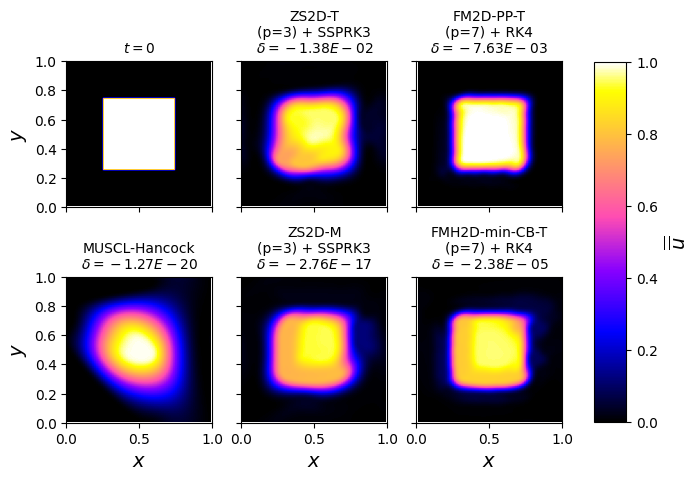

In [35]:
fig, axs = plt.subplots(2, 3, sharex=True, sharey=True)

n = 64
snapshot_dt = 1.0
num_snapshots = 100
i = -1
fontsize = 14
cmap = "gnuplot2"

# initial condition
solver = AdvectionSolver(
    n=(n,),
    **problem_configs["square2d"],
)
im = solver.plot_map(
    axs[0, 0],
    cmap=cmap,
)
axs[0, 0].set_title("$t=0$", fontsize=10)

# MUSCL-Hancock
solver = AdvectionSolver(
    n=(n,),
    order=2,
    snapshot_dt=snapshot_dt,
    num_snapshots=num_snapshots,
    **limiting_schemes["MUSCL-Hancock"],
    **problem_configs["square2d"],
    **solver_config,
)
solver.euler()
solver.plot_map(
    axs[1, 0],
    cmap=cmap,
    i=i,
)
axs[1, 0].set_title(
    f"MUSCL-Hancock\n$\delta={solver.compute_mpp_violations()[1]['worst']:.2E}$",
    fontsize=10,
)

# ZS2D-T
solver = AdvectionSolver(
    n=(n,),
    order=4,
    snapshot_dt=snapshot_dt,
    num_snapshots=num_snapshots,
    **limiting_schemes["ZS2D-T"],
    **problem_configs["square2d"],
    **solver_config,
)
solver.ssprk3()
solver.plot_map(
    axs[0, 1],
    cmap=cmap,
    i=i,
)
axs[0, 1].set_title(
    f"ZS2D-T\n(p=3) + SSPRK3\n$\delta={solver.compute_mpp_violations()[1]['worst']:.2E}$",
    fontsize=10,
)


# ZS2D-M
solver = AdvectionSolver(
    n=(n,),
    order=4,
    snapshot_dt=snapshot_dt,
    num_snapshots=num_snapshots,
    **limiting_schemes["ZS2D-M"],
    **problem_configs["square2d"],
    **solver_config,
)
solver.ssprk3()
solver.plot_map(
    axs[1, 1],
    cmap=cmap,
    i=i,
)
axs[1, 1].set_title(
    f"ZS2D-M\n(p=3) + SSPRK3\n$\delta={solver.compute_mpp_violations()[1]['worst']:.2E}$",
    fontsize=10,
)


# FM2D-PP-T
solver = AdvectionSolver(
    n=(n,),
    order=8,
    snapshot_dt=snapshot_dt,
    num_snapshots=num_snapshots,
    **limiting_schemes["FM2D-PP-T"],
    **problem_configs["square2d"],
    **solver_config,
)
solver.rkorder()
solver.plot_map(
    axs[0, 2],
    cmap=cmap,
    i=i,
)
axs[0, 2].set_title(
    f"FM2D-PP-T\n(p=7) + RK4\n$\delta={solver.compute_mpp_violations()[1]['worst']:.2E}$",
    fontsize=10,
)

# FMH2D-min-CB-T
solver = AdvectionSolver(
    n=(n,),
    order=8,
    snapshot_dt=snapshot_dt,
    num_snapshots=num_snapshots,
    **limiting_schemes["FMH2D-min-CB-T"],
    **problem_configs["square2d"],
    **solver_config,
)
solver.rkorder()
solver.plot_map(
    axs[1, 2],
    cmap=cmap,
    i=i,
)
axs[1, 2].set_title(
    f"FMH2D-min-CB-T\n(p=7) + RK4\n$\delta={solver.compute_mpp_violations()[1]['worst']:.2E}$",
    fontsize=10,
)

# cosmetics
for i, j in product((0, 1), (0, 1, 2)):
    axs[i, j].set_xlim(0, 1)
    axs[i, j].set_ylim(0, 1)

cb_ax = fig.add_axes([0.95, 0.12, 0.05, 0.75])
cb = plt.colorbar(im, cax=cb_ax, ax=axs[0, 2])
cb.set_label(label="$\overline{\overline{u}}$", size=fontsize)
axs[1, 0].set_xlabel("$x$", fontsize=fontsize)
axs[1, 1].set_xlabel("$x$", fontsize=fontsize)
axs[1, 2].set_xlabel("$x$", fontsize=fontsize)
axs[0, 0].set_ylabel("$y$", fontsize=fontsize)
axs[1, 0].set_ylabel("$y$", fontsize=fontsize)
plt.subplots_adjust(hspace=0.4)

fig.savefig("images/square2d_cmap.png", dpi=300, bbox_inches="tight")